# Linear Regression - Boston housing dataset

Begin by importing all necessary modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import pylab

mpl.style.available
mpl.style.use('ggplot') 

%matplotlib inline 

The Boston Housing dataset concerns housing values in suburbs of Boston.
Each entry is composed by the following features:

1. CRIM      per capita crime rate by town
2. ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS     proportion of non-retail business acres per town
4. CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX       nitric oxides concentration (parts per 10 million)
6. RM        average number of rooms per dwelling
7. AGE       proportion of owner-occupied units built prior to 1940
8. DIS       weighted distances to five Boston employment centres
9. RAD       index of accessibility to radial highways
10. TAX      full-value property-tax rate per $\$$10,000
11. PTRATIO  pupil-teacher ratio by town
12. B        demographic data
13. LSTAT    $\%$ lower status of the population
14. MEDV     Median value of owner-occupied homes in $\$$1000's
---------------------------------------------------------------------------------------------

    
Load Housing data onto a data frame. Use pd.read_csv(...)

In [2]:
df = pd.read_csv('data/housing_data.csv', delim_whitespace=True, header=None)

Explore first lines and data format using df.head()

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Let's divide and normalise data

In [4]:
# first 13 variables are features
X = df.iloc[:, :13]

# last variable is the label
Y = df.iloc[:, 13]

for j in xrange(13):
    X.iloc[:,j]=X.iloc[:,j]-np.mean(X.iloc[:,j]);
    X.iloc[:,j]=X.iloc[:,j]/np.std(X.iloc[:,j]);

# Normalise the data    
Y = Y - np.mean(Y);
Y = Y/np.std(Y);

Use plt.scatter() to plot one of the features against the labels

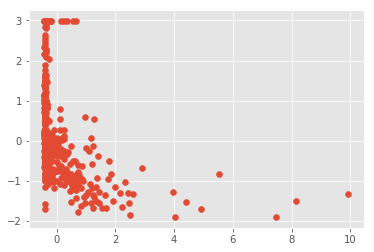

In [5]:
plt.scatter(X.iloc[:, 0],Y)

Now we want to see what the other variables look like, to select the one that has the most evident linear correlation with the labels

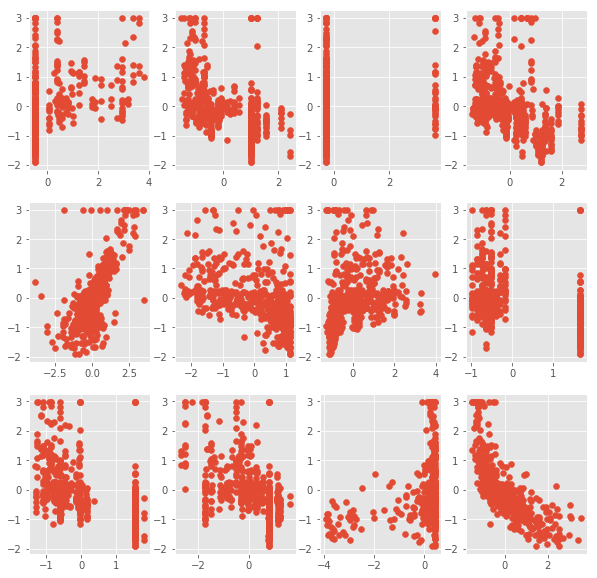

In [6]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 10))
feat = 1
for i in xrange(3):
    for j in xrange(4):
        axes[i, j].scatter(X.iloc[:, feat], Y)
        feat+=1


Let's select one of the variables (where can you see a clear trend?)

In [7]:
var = 0
x = X.iloc[:, var]

Define Linear Function :
$$f = \theta_0 + \theta_1 x$$

In [8]:
def LinFunc(x,theta0,theta1):
    f = theta0 + theta1*x
    return f

Choose values for $\theta_0$ and $\theta_1$. Use then linfunc to predict labels for X. Save as a new vector called 'Ypredicted'

In [9]:
theta0 = 0
theta1 = 0
Ypredicted = LinFunc(x,theta0,theta1)

Create scatter plot and overlay predictions using plt.plot()

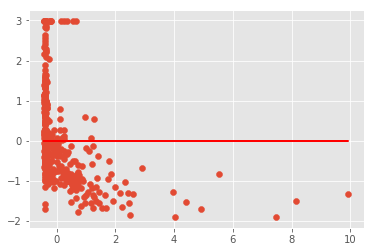

In [10]:
plt.scatter(x,Y)
plt.plot(x,Ypredicted, c='r')

**Exercise:** Vary $\theta_0$ and $\theta_1$ parameters above and replot to get good fit

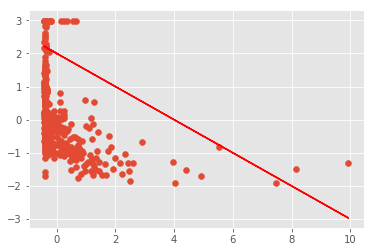

In [13]:
theta0 = 2
theta1 = -0.5
Ypredicted = LinFunc(x,theta0,theta1)
plt.scatter(x,Y)
plt.plot(x,Ypredicted, c='r')

## Cost function

Define cost function:
$$C = \frac{1}{2m} \sum_{i=1}^m (y_{pred}^i - y_{obs}^i)^2$$

In [14]:
def CostFunction(y_obs,y_pred):
    cost = np.sum((y_pred - y_obs)**2) / (2.0*len(y_pred))
    return cost

The following function creates function to plot cost across a range of values

In [15]:
def plotCost(x, y, range0=np.linspace(-500, 500, 50), range1=np.linspace(-500, 500, 50)):
    PlotVec = []
    for theta_0 in range0:
        for theta_1 in range1:
            y_predicted_test = LinFunc(x,theta_0,theta_1)
            cost = CostFunction(y,y_predicted_test)
            PlotVec.append([theta_0,theta_1,cost])
    PlotVec = np.array(PlotVec)
    plt.tricontour(PlotVec[:,0],PlotVec[:,1],PlotVec[:,2], 80)
    print 'min err:', PlotVec[:, 2].min()

Use function to plot cost surface

min err: 100.660990041


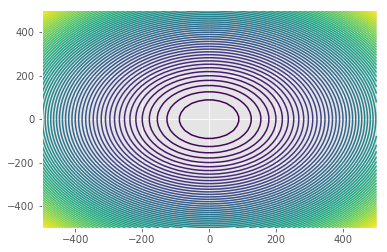

In [16]:
plotCost(x, Y)

Use plot to determine likely optimum values for theta_0 and theta_1. Set below then plot as before

## Gradient Descent

Define two gradient functions:
$$g_0 = \frac{1}{m} \sum_{i=1}^m (y_{pred}^i - y_{obs}^i)$$
$$g_1 = \frac{1}{m} \sum_{i=1}^m (y_{pred}^i - y_{obs}^i).x^i$$

In [17]:
def g0(y_obs,y_pred):
    g0 = (1/float(len(y_pred))) * np.sum((y_pred - y_obs))
    return g0

def g1(x,y_obs,y_pred):
    g1 = (1/float(len(y_pred))) * np.sum((y_pred - y_obs)*x)
    return g1

Finish gradient descent algorithm where:
$$\theta_0 := \theta_0 - \alpha_0 g_0$$
$$\theta_1 := \theta_1 - \alpha_1 g_1$$

In [18]:
def GradDescent(x, y, theta0,theta1,alpha_0,alpha_1):
    converged = False
    
    #theta_record stores all values for plotting
    theta_record = []               
    theta_record.append([theta0,theta1])
    
    while not converged:
        #Calculate prediction for parameter values
        Ypredicted = LinFunc(x, theta0, theta1)
        
        #Update parameters
        theta0 = theta0 - alpha_0 * g0(y,Ypredicted)
        theta1 = theta1 - alpha_1 * g1(x,y,Ypredicted)
    
        #Checking for convergence
        old_values = np.array(theta_record[-1])
        new_values = np.array([theta0,theta1])
        squared_diff = np.sum((old_values-new_values)**2)
        
        if squared_diff < 10**-7:
            converged = True
       
        theta_record.append([theta0,theta1])
        
    print "Minimum found at ", theta_record[-1], " in ", np.size(theta_record), " steps"
    return np.array(theta_record)

Set initial guess for parameters and look at alpha values, then run Gradient Descent algorithm

In [19]:
theta0_guess = 0
theta1_guess = 0
alpha_0 = 0
alpha_1 = 0


theta_record = GradDescent(x, Y, theta0_guess,theta1_guess,alpha_0,alpha_1)

Minimum found at  [0.0, 0.0]  in  4  steps


Use following to plot cost surface and parameter update history

min err: 0.424781800078


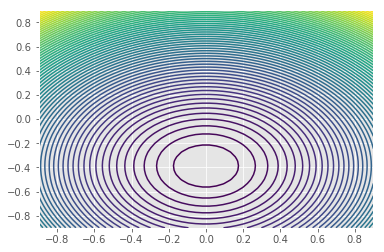

In [20]:
plotCost(x, Y, range0=np.linspace(-0.9, 0.9, 50), range1=np.linspace(-0.9, 0.9, 50))
plt.plot(theta_record[:,0],theta_record[:,1])
#print theta_record

Plot scatter and predicted function as before

In [ ]:
Ypredicted = LinFunc(x, theta_record[-1][0], theta_record[-1][1])
plt.scatter(x,Y)
plt.plot(x,Ypredicted,c='r')

Go back and vary both the initial guesses for the parameters and the alpha values to get a feel for how the gradient descent algorithm works, and how susceptible it is to changes in alpha